# Ames Housing Notebook: 03B - Ridge Model
***
### Importing basline packages as well as scikit learn - linear_model, model_selection, metrics, and pre-processing packages

In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Reading in the polynomials csv I created at the end of the 03A_MLR_Model notebook 

In [350]:
poly_df = pd.read_csv('../datasets/polynomials_df.csv', index_col = [0])

In [351]:
poly_df.head(2)

,overall_qual_x,gr_liv_area_x,garage_area_x,garage_cars_x,total_bsmt_sf_x,1st_flr_sf_x,year_built_x,year_remod/add_x,full_bath_x,garage_yr_blt_x,...,wood_deck_sf_x,lot_area_x,bsmt_full_bath_x,half_bath_x,2nd_flr_sf_x,bsmt_unf_sf_x,bedroom_abvgr_x,screen_porch_x,overall_cond_x,saleprice_x
0,6,1479,475.0,2.0,725.0,725,1976,2005,2,1976.0,...,0,13517,0.0,1,754,192.0,3,0,8,130500
1,7,2122,559.0,2.0,913.0,913,1996,1997,2,1997.0,...,0,11492,1.0,1,1209,276.0,4,0,5,220000


### Creating features matrix (X) and target vector (y)

In [352]:
X = poly_df.drop('saleprice_x', axis=1)
y = poly_df['saleprice_x']

### Instantiating PolynomialFeatures object to create all two-way terms.

In [353]:
# Instantiate PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

### Fitting and transforming the X data.

In [354]:
# Fit and transform the X data.
X_overfit = poly.fit_transform(X)

### Using the get-feature-names method to see how poly.fit_transform(X) worked

In [355]:
poly.get_feature_names(X.columns)\

['overall_qual_x',
 'gr_liv_area_x',
 'garage_area_x',
 'garage_cars_x',
 'total_bsmt_sf_x',
 '1st_flr_sf_x',
 'year_built_x',
 'year_remod/add_x',
 'full_bath_x',
 'garage_yr_blt_x',
 'mas_vnr_area_x',
 'totrms_abvgrd_x',
 'fireplaces_x',
 'ms_subclass_x',
 'open_porch_sf_x',
 'wood_deck_sf_x',
 'lot_area_x',
 'bsmt_full_bath_x',
 'half_bath_x',
 '2nd_flr_sf_x',
 'bsmt_unf_sf_x',
 'bedroom_abvgr_x',
 'screen_porch_x',
 'overall_cond_x',
 'overall_qual_x^2',
 'overall_qual_x gr_liv_area_x',
 'overall_qual_x garage_area_x',
 'overall_qual_x garage_cars_x',
 'overall_qual_x total_bsmt_sf_x',
 'overall_qual_x 1st_flr_sf_x',
 'overall_qual_x year_built_x',
 'overall_qual_x year_remod/add_x',
 'overall_qual_x full_bath_x',
 'overall_qual_x garage_yr_blt_x',
 'overall_qual_x mas_vnr_area_x',
 'overall_qual_x totrms_abvgrd_x',
 'overall_qual_x fireplaces_x',
 'overall_qual_x ms_subclass_x',
 'overall_qual_x open_porch_sf_x',
 'overall_qual_x wood_deck_sf_x',
 'overall_qual_x lot_area_x',
 'ov

### Examining the dimensions of X_overfit

In [356]:
# Check out the dimensions of X_overfit.
X_overfit.shape

(2049, 324)

### Creating the Train Test Split Function

In [357]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    test_size=0.3,
    random_state=42
)

### Printing the shapes of X_train, y_train, X_test, and y_test

In [358]:
print(f'X_train shape is: {X_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'X_test shape is: {X_test.shape}')
print(f'y_test shape is: {y_test.shape}')

X_train shape is: (1434, 324)
y_train shape is: (1434,)
X_test shape is: (615, 324)
y_test shape is: (615,)


### Instantiating Standard Scaler

In [359]:
# Instantiate Standard Scaler.
sc = StandardScaler()

### Fitting and transforming Standard Scaler to overfit the data in one step.

In [360]:
# Fit AND transform Standard Scaler to overfit data in one step.
# Z_overfit_train = pd.DataFrame(ss_overfit.fit_transform(X_overfit_train))
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

### Examining Z_train in a matrix of 10 rows and 3 columns

In [361]:
Z_train[:10, :3]

array([[-0.04717383, -0.53604343, -0.3202796 ],
       [ 0.65022069, -0.0131528 ,  0.06544151],
       [-1.44196286, -0.30547748,  0.46997829],
       [ 0.65022069,  0.51179645, -0.17445821],
       [-0.74456835, -0.60603666,  0.32886081],
       [-0.74456835, -1.17833427, -0.85652603],
       [ 0.65022069,  0.73618652,  0.07484934],
       [ 0.65022069,  1.72432628, -0.32968744],
       [-0.74456835,  0.46856533,  0.55464878],
       [ 1.34761521, -0.42076045,  0.16892766]])

### Instantiating Ridge model with alpha=10

In [362]:
# Instantiate.
ridge_model = Ridge(alpha=10)

### Fitting model to Z_train and y_train

In [363]:
# Fit.
ridge_model.fit(Z_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

### Examining R2 score of the Ridge model

In [364]:
# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.9352708667782593
0.918181173820229


### Much improved R2 score from the log model.  Also, this model is not underfit like the previous 3
***
### Setting up a list of ridge alphas and fitting the model to the best ridge alpha

In [365]:
# Set up a list of ridge alphas to check.
# Generates 100 values equally between 0 and 6,
# then converts them to alphas between 10^0 and 10^5.
alphas_ridge = np.logspace(0, 6, 100)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
    alphas=alphas_ridge,
    scoring='r2',
    cv=5
    )
# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.14975700e+00, 1.32194115e+00, 1.51991108e+00,
       1.74752840e+00, 2.00923300e+00, 2.31012970e+00, 2.65608778e+00,
       3.05385551e+00, 3.51119173e+00, 4.03701726e+00, 4.64158883e+00,
       5.33669923e+00, 6.13590727e+00, 7.05480231e+00, 8.11130831e+00,
       9.32603347e+00, 1.07226722e+01, 1.23284674e+01, 1.41747416e+01,
       1.62975083e+01, 1.87381742e+0...
       7.05480231e+04, 8.11130831e+04, 9.32603347e+04, 1.07226722e+05,
       1.23284674e+05, 1.41747416e+05, 1.62975083e+05, 1.87381742e+05,
       2.15443469e+05, 2.47707636e+05, 2.84803587e+05, 3.27454916e+05,
       3.76493581e+05, 4.32876128e+05, 4.97702356e+05, 5.72236766e+05,
       6.57933225e+05, 7.56463328e+05, 8.69749003e+05, 1.00000000e+06]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [366]:
# Here is the optimal value of alpha
ridge_cv.alpha_

65.79332246575683

### Above is the optimal ridge_cv alpha
***
### Re-testing R2 scores for train and test ridge models

In [367]:
train_ridge_r2 = ridge_cv.score(Z_train, y_train)
train_ridge_r2

0.9266385835352121

In [368]:
test_ridge_r2 = ridge_cv.score(Z_test, y_test)
test_ridge_r2

0.9286469765664893

### Train and test are nearly identical.  Our model is now fit very nicely with a higher R2 score
***
### Calculating RMSE for train and test ridge models

In [369]:
predict_ridge_train = ridge_cv.predict(Z_train)

In [370]:
predict_ridge_test = ridge_cv.predict(Z_test)

In [371]:
train_ridge_rmse = np.sqrt(mean_squared_error(y_train, predict_ridge_train))
train_ridge_rmse

21142.187457743818

In [372]:
test_ridge_rmse = np.sqrt(mean_squared_error(y_test, predict_ridge_test))
test_ridge_rmse

21873.744176516888

### The RMSE has dropped about 8000 points compared to our MLR models
***
### Plotting predicted vs. actual y values of the Ridge Model

In [373]:
y_preds_ridge

array([131597.52896236, 320168.99467966, 117904.56231574, 126264.85394082,
       106730.71936082, 300156.07816059, 214078.2042817 , 184667.37524493,
       260440.29733274, 145951.04247418, 196763.98489227, 278138.63209302,
       109346.29498054, 122501.8257549 , 268364.053791  ,  97822.91034854,
       219708.16008952, 193443.77937688,  85880.0533098 , 238473.01667637,
       152286.39107167, 122785.06101884, 103910.17441623, 219483.38805936,
       124254.57806965, 155548.12822704,  99882.06726773, 192172.9853642 ,
       212270.84600973, 132551.90323031, 139732.38718873, 223599.20165997,
       130873.52568703, 214094.33733148, 110491.6373301 , 287381.56667134,
       192456.9340653 , 130463.40853751, 115525.79721493, 124890.80115954,
       177967.40743779, 201464.61538057, 113526.88401159, 139020.88659483,
       239265.26353803, 132802.34245163, 182483.26818843, 186755.82011238,
        91014.06968214, 141852.99248327,  91370.05006232, 124923.06377471,
       176997.30268639,  

In [374]:
X.shape

(2049, 24)

In [375]:
y_preds_ridge = ridge_cv.predict(Z_test)

In [376]:
y_test.shape

(615,)

In [377]:
y_preds_ridge.shape

(615,)

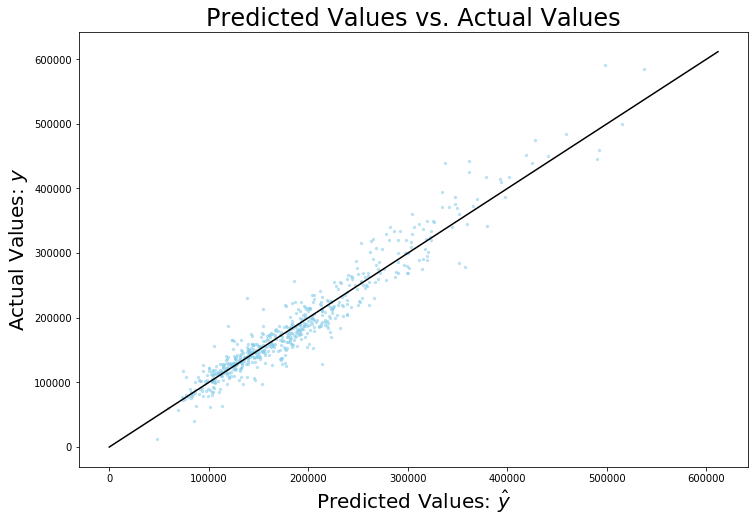

In [378]:
# Plot the model
plt.figure(figsize=(12,8))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds_ridge, y_test, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### Plot looks more linear than not even as sale prices increase.
*** 
### Adding R2 and RMSE scores of the Ridge model to the Model Comparisons Table.  Saving changes to csv

In [379]:
#table = pd.read_csv('../datasets/model_comparisons_table.csv', index_col = [0])
#table = table.drop('ridge_model', axis=1)

In [380]:
#table['ridge_model'] = [train_ridge_r2, test_ridge_r2, train_ridge_rmse, test_ridge_rmse]

In [381]:
#table.to_csv('../datasets/model_comparisons_table.csv')